In [42]:
import tensorflow
import keras
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as pl
from matplotlib import style
import pickle


In [43]:
data = pd.read_csv("student-mat.csv", sep=";")
print(data.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [44]:
data=data[["G1","G2","G3","absences","failures"]]


In [45]:
predict = "G3"
x=np.array(data.drop(predict,1))#features
y=np.array(data[predict])



In [47]:
x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(x,y,test_size=0.1)
best =0
for _ in range(20):
    x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(x,y,test_size=0.1)
   
    linear = linear_model.LinearRegression()
    linear.fit(x_train,y_train)
    acc = linear.score(x_test,y_test)
    print("Accuracy: ",acc)
    
    if acc>best:
        best=acc
        with open("studentgrades.pickle","wb") as f:
            pickle.dump(linear,f)

# LOAD MODEL
pickle_in = open("studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)
        

print("-------------------------")
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)
print("-------------------------")

predicted= linear.predict(x_test)
for x in range(len(predicted)):
    print(predicted[x], x_test[x], y_test[x])

plot="failures"

    

Accuracy:  0.8903177195438982
Accuracy:  0.8488526967701138
Accuracy:  0.9216035443098727
Accuracy:  0.713694074997907
Accuracy:  0.729843162519956
Accuracy:  0.7888039705718338
Accuracy:  0.7686436478834509
Accuracy:  0.7702367599881124
Accuracy:  0.7350048797796377
Accuracy:  0.741432094858515
Accuracy:  0.8493874406005782
Accuracy:  0.8340697568161274
Accuracy:  0.8428725730806205
Accuracy:  0.8945016671480769
Accuracy:  0.8202142313925369
Accuracy:  0.8112307692683681
Accuracy:  0.8508096483125085
Accuracy:  0.7893815394618211
Accuracy:  0.853095158497543
Accuracy:  0.801163713361041
-------------------------
Coefficient: 
 [ 0.15011004  0.98970896  0.05167783 -0.26304105]
Intercept: 
 -2.0648109125891736
-------------------------
11.406577372367883 [11 12  4  1] 11
18.761998149753957 [18 18  6  0] 18
10.65758055443764 [13 10 22  1] 11
6.719871562405434 [10  8  3  3] 7
3.4844456433634567 [3 5 8 1] 5
8.550381496112921 [10  9  4  0] 9
6.064032153078033 [8 7 0 0] 8
7.0537411128992495 

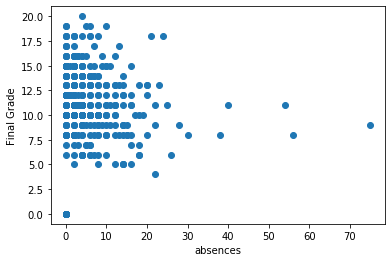

In [72]:
plot = "absences"
pl.scatter(data[plot],data["G3"])
newdf=data.drop("G3", axis="columns")
pl.xlabel(plot)
pl.ylabel("Final Grade")
pl.show()